In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('car/train.csv')

In [4]:
df_test = pd.read_csv('car/test.csv')

In [5]:
df_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500


In [6]:
df_test

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8
...,...,...,...,...,...,...,...,...,...,...
406,406,nissan,2021,petrol,33400 km,left,black,suv,excellent,2.0
407,407,hyundai,2017,petrol,60000 miles,left,other,sedan,excellent,2.0
408,408,mercedes-benz,2012,petrol,218000 km,left,white,sedan,good,2.0
409,409,kia,2020,petrol,40000 miles,left,red,sedan,good,2.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
df_train['model'] = label.fit_transform(df_train['model'])

In [11]:
df_test['model'] = label.transform(df_test['model'])

<Axes: xlabel='motor_type', ylabel='count'>

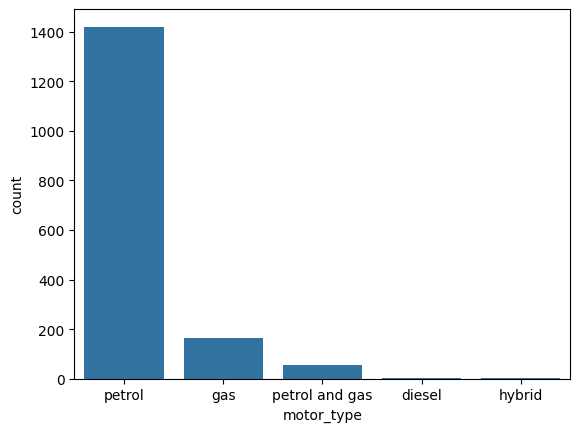

In [12]:
sns.countplot(x=df_train['motor_type'])

In [13]:
df_train = df_train[(df_train['motor_type'] != 'diesel') & (df_train['motor_type'] != 'hybrid')]

<Axes: xlabel='motor_type', ylabel='count'>

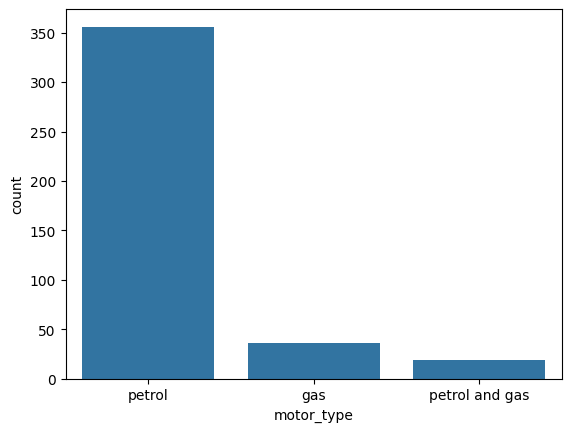

In [14]:
sns.countplot(x=df_test['motor_type'])

<Axes: xlabel='motor_type', ylabel='count'>

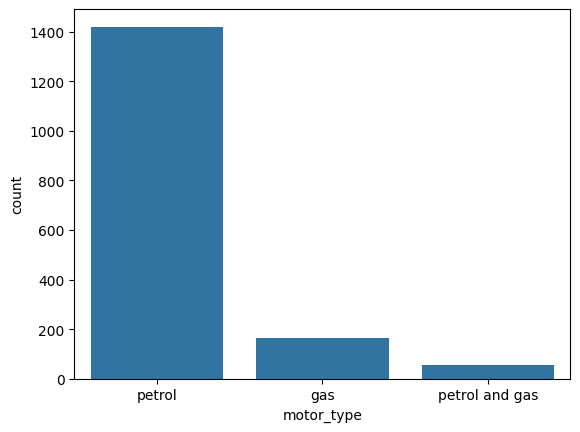

In [15]:
sns.countplot(x=df_train['motor_type'])

In [16]:
df_train['motor_type'] = label.fit_transform(df_train['motor_type'])
df_test['motor_type'] = label.transform(df_test['motor_type'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1156\1466674421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['motor_type'] = label.fit_transform(df_train['motor_type'])


In [17]:
def convert(running):
    running = running.split(' ')
    if running[1] == 'km':
        return int(running[0])
    else:
        return int(running[0]) * 1.60934

In [18]:
df_train['running'] = df_train['running'].apply(convert)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1156\3142608572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['running'] = df_train['running'].apply(convert)


In [19]:
df_test['running'] = df_test['running'].apply(convert)

In [20]:
df_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,4,2022,1,4828.0200,left,skyblue,sedan,excellent,2.0,24500
1,2,2014,1,212432.8800,left,black,sedan,excellent,2.0,25500
2,1,2018,1,152887.3000,left,other,sedan,excellent,2.0,11700
3,2,2002,1,220479.5800,left,golden,sedan,excellent,3.2,12000
4,2,2017,1,209214.2000,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1637,0,2017,1,193120.8000,left,white,sedan,good,2.0,12400
1638,4,2014,1,273587.8000,left,black,sedan,good,2.0,16500
1639,3,2018,1,110883.5260,left,blue,suv,good,2.0,19500
1640,3,2019,1,49889.5400,left,black,suv,excellent,2.0,19500


In [21]:
df_test

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,1,2020,1,38624.160,left,black,sedan,excellent,2.0
1,1,3,2017,1,136793.900,left,white,suv,excellent,2.0
2,2,0,2021,1,48280.200,left,white,sedan,excellent,2.0
3,3,1,2018,1,85295.020,left,silver,sedan,excellent,2.0
4,4,2,2003,1,370148.200,left,black,Universal,normal,1.8
...,...,...,...,...,...,...,...,...,...,...
406,406,3,2021,1,53751.956,left,black,suv,excellent,2.0
407,407,0,2017,1,96560.400,left,other,sedan,excellent,2.0
408,408,2,2012,1,350836.120,left,white,sedan,good,2.0
409,409,1,2020,1,64373.600,left,red,sedan,good,2.0


In [22]:
df_train['wheel'].value_counts()

wheel
left    1639
Name: count, dtype: int64

In [23]:
df_test['wheel'].value_counts()

wheel
left     409
right      2
Name: count, dtype: int64

In [24]:
df_train = df_train.drop('wheel', axis=1)
df_test = df_test.drop('wheel', axis=1)

In [25]:
df_train['color'] = label.fit_transform(df_train['color'])
df_test['color'] = label.transform(df_test['color'])

In [26]:
df_train['type'] = label.fit_transform(df_train['type'])
df_test['type'] = label.transform(df_test['type'])

In [27]:
df_train['status'] = label.fit_transform(df_train['status'])
df_test['status'] = label.transform(df_test['status'])

In [28]:
df_test = df_test.drop('Id',axis=1)

In [29]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
scaler = StandardScaler()

In [32]:
model = RandomForestRegressor()

In [33]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [34]:
params = {
         'model__bootstrap': [True, False],
         'model__criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
         'model__max_depth': [10, 20],
         'model__max_features': ["sqrt", "log2", None],
         'model__min_samples_leaf': [0,1, 2],
         'model__min_samples_split': [0,1,2],
         'model__n_estimators': [60, 80, 100]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
full_model = GridSearchCV(pipe, param_grid=params, cv=2, verbose=2)

In [37]:
full_model.fit(X, y)

Fitting 2 folds for each of 1296 candidates, totalling 2592 fits
[CV] END model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=0, model__min_samples_split=0, model__n_estimators=60; total time=   0.0s
[CV] END model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=0, model__min_samples_split=0, model__n_estimators=60; total time=   0.0s
[CV] END model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=0, model__min_samples_split=0, model__n_estimators=80; total time=   0.0s
[CV] END model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=0, model__min_samples_split=0, model__n_estimators=80; total time=   0.0s
[CV] END model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_fea

C:\Users\Asus\Desktop\jupiter\virtualcomputer\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2016 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\Desktop\jupiter\virtualcomputer\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\Desktop\jupiter\virtualcomputer\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\Desktop\jupiter\virtualcomput

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__bootstrap': [True, False],
                         'model__criterion': ['squared_error', 'absolute_error',
                                              'friedman_mse', 'poisson'],
                         'model__max_depth': [10, 20],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [0, 1, 2],
                         'model__min_samples_split': [0, 1, 2],
                         'model__n_estimators': [60, 80, 100]},
             verbose=2)

In [38]:
y_pred = full_model.predict(df_test)

In [39]:
sub = pd.read_csv('car/sample_submission.csv')

In [40]:
sub

,Id,price
0,0,38
1,1,20549
2,2,3927
3,3,5572
4,4,28598
...,...,...
406,406,2514
407,407,20307
408,408,27274
409,409,14422


In [41]:
sub['price'] = y_pred

In [42]:
sub.to_csv('prediction1.csv',index=False,index_label=False)